<a href="https://colab.research.google.com/github/Rushitha006/Weather-App/blob/main/Coin_Change_Visualizer_using_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available Coins: [1, 2, 5, 10]
Target Amount: 17

💰 Greedy Approach:
Coins used: [10, 5, 2]
Total coins used: 3
Time taken: 0.000128 seconds

🧠 Dynamic Programming Approach:
Minimum coins needed: 3
Coins used: [2, 5, 10]
Time taken: 0.000101 seconds


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


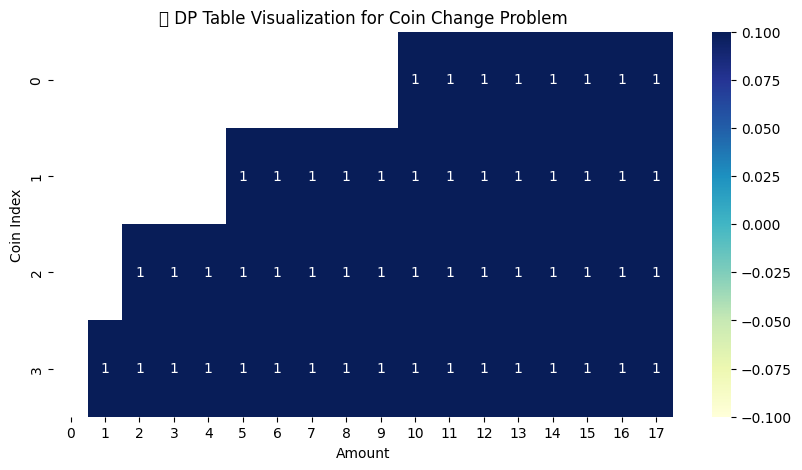


📊 Comparison Summary:
Greedy Coins Used: 3 -> [10, 5, 2]
DP Minimum Coins: 3 -> [2, 5, 10]

✅ Greedy and DP give the same result for this set of coins.


In [1]:
# 🪙 Coin Change Visualizer using Dynamic Programming
# ADSA Mini Project - Dynamic Programming

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# -----------------------------------------
# 1️⃣ Input Section
# -----------------------------------------
coins = [1, 2, 5, 10]
amount = 17

print("Available Coins:", coins)
print("Target Amount:", amount)

# -----------------------------------------
# 2️⃣ Greedy Approach (For Comparison)
# -----------------------------------------
def greedy_coin_change(coins, target):
    coins.sort(reverse=True)
    used = []
    remaining = target
    for c in coins:
        while remaining >= c:
            remaining -= c
            used.append(c)
    return used

start = time.time()
greedy_result = greedy_coin_change(coins, amount)
end = time.time()

print("\n💰 Greedy Approach:")
print("Coins used:", greedy_result)
print("Total coins used:", len(greedy_result))
print("Time taken:", round(end - start, 6), "seconds")

# -----------------------------------------
# 3️⃣ Dynamic Programming (Bottom-Up)
# -----------------------------------------
def coin_change_dp(coins, target):
    dp = [float('inf')] * (target + 1)
    dp[0] = 0  # base case

    # Record which coin was used
    used_coin = [-1] * (target + 1)

    for coin in coins:
        for amt in range(coin, target + 1):
            if dp[amt - coin] + 1 < dp[amt]:
                dp[amt] = dp[amt - coin] + 1
                used_coin[amt] = coin

    # Reconstruct coins used
    if dp[target] == float('inf'):
        return dp, [], used_coin
    result = []
    curr = target
    while curr > 0:
        c = used_coin[curr]
        result.append(c)
        curr -= c
    return dp, result, used_coin

start = time.time()
dp_array, dp_result, used_coin = coin_change_dp(coins, amount)
end = time.time()

print("\n🧠 Dynamic Programming Approach:")
print("Minimum coins needed:", dp_array[amount])
print("Coins used:", dp_result)
print("Time taken:", round(end - start, 6), "seconds")

# -----------------------------------------
# 4️⃣ Create DP Table (for Visualization)
# -----------------------------------------
max_amount = amount
dp_table = np.zeros((len(coins), max_amount + 1))

for i, coin in enumerate(coins):
    for amt in range(max_amount + 1):
        if amt < coin:
            dp_table[i][amt] = np.inf
        elif amt == coin:
            dp_table[i][amt] = 1
        else:
            dp_table[i][amt] = min(
                dp_table[i][amt - 1] if amt - 1 >= 0 else np.inf,
                1 + dp_table[i][amt - coin] if amt - coin >= 0 else np.inf
            )

# -----------------------------------------
# 5️⃣ Visualize DP Table
# -----------------------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(dp_table, annot=True, cmap="YlGnBu", fmt=".0f", cbar=True)
plt.xlabel("Amount")
plt.ylabel("Coin Index")
plt.title("🪙 DP Table Visualization for Coin Change Problem")
plt.show()

# -----------------------------------------
# 6️⃣ Comparison Summary
# -----------------------------------------
print("\n📊 Comparison Summary:")
print(f"Greedy Coins Used: {len(greedy_result)} -> {greedy_result}")
print(f"DP Minimum Coins: {dp_array[amount]} -> {dp_result}")

if len(greedy_result) == dp_array[amount]:
    print("\n✅ Greedy and DP give the same result for this set of coins.")
else:
    print("\n⚠️ Greedy failed to find the optimal solution, but DP succeeded!")
